In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

C:\Users\saadt\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


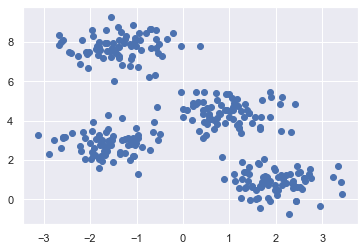

In [2]:
# manually generate dataset
# use the make_blobs() function with n_samples=300,centers=4,cluster_std=0.6 and random_state=0
# store the return value to X and y_true
X,y_true = make_blobs(n_samples=300,centers=4,cluster_std=0.6, random_state=0)
# plot the dataset using plt.scatter()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [3]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
#     using np.random.RandomState first to set the seed and store it to a variable r
    r = np.random.RandomState(rseed) 
#     using r.permutation(data shape) to choose first k data point index as initial center.
    k = r.permutation(X)[:n_clusters]
    #store the center to a list.
    centerlist = []
    for i_index in range(len(k)):
          centerlist.append(k[i_index])    
    centerlist = np.array(centerlist)
    # repeat until convergence:
    convergence = False
    while not convergence:
        # Assign labels based on closest center using pairwise_distances_argmin()
        labels =pairwise_distances_argmin(X,centerlist)
        # Find new centers from means of points:
        # Update centroid of each cluster to be the average(mean) of examples assigned to cluster k
        newcenters = np.empty((4, 2))
        for i in range(len(centerlist)):    
            newcenters[i][0],newcenters[i][1] = getcenterpointsMEAN(labels,X,i)
        # check for convergence:
        # convergence if old center is new center
        if ((newcenters==centerlist).all()):
            convergence = True
        else:
            centerlist = newcenters
    #return the centers and labels  
    return centerlist,labels

def getcenterpointsMEAN(labels,X,i):
    IndexofI=np.where(labels == i)
    IndexofIinX= X[IndexofI]
    newcenters_1 = IndexofIinX.mean(0)[0]
    newcenters_2 = IndexofIinX.mean(0)[1]
    return newcenters_1,newcenters_2

## Fitting the model on the dataset and plot the figure with default seed (Graph 1)

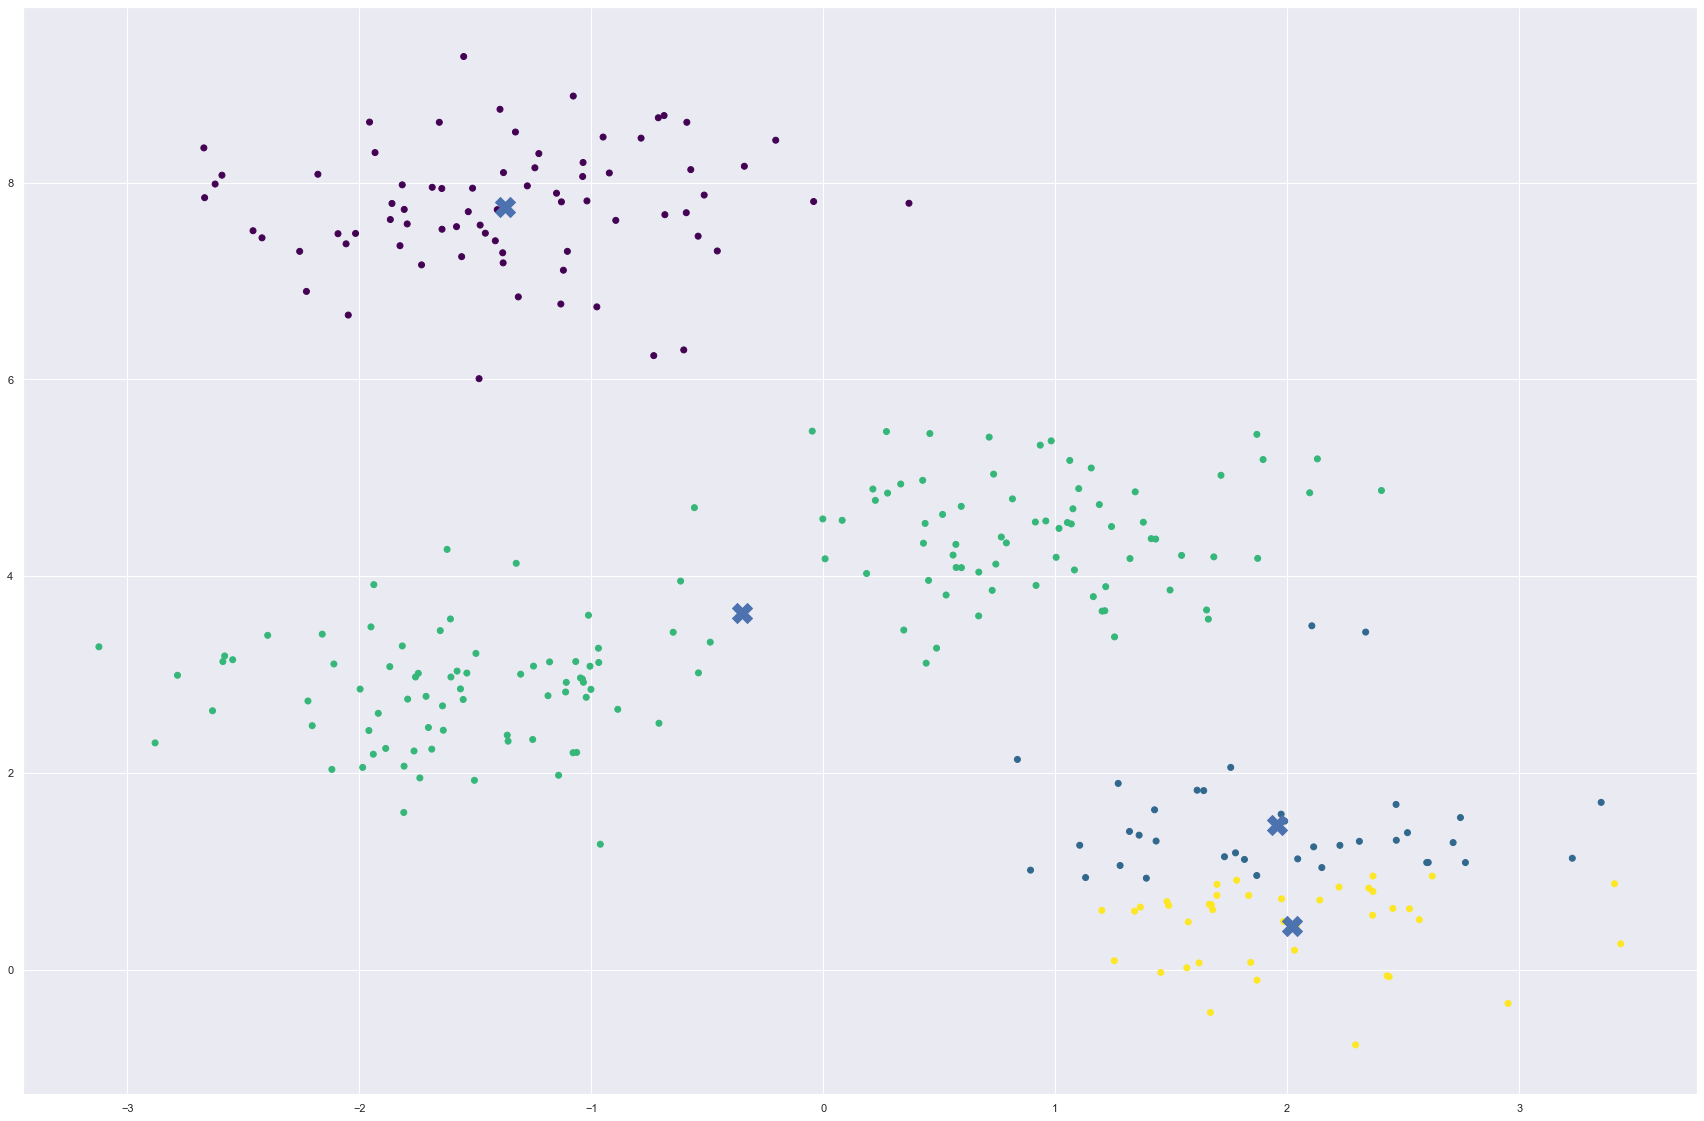

In [4]:
# fit our function to the data set with the starting point rseed=0.
centers, labels = find_clusters(X,4,0)
plt.figure(figsize=(30, 20))
plt.scatter(X[:,0],X[:,1],c=labels, cmap='viridis')
plt.scatter(centers[:, 0],centers[:, 1],marker='X',s=400)
plt.show()
# plot the figure

## Fit the model on the dataset and plot the figure with seed= 2 (Graph 2)


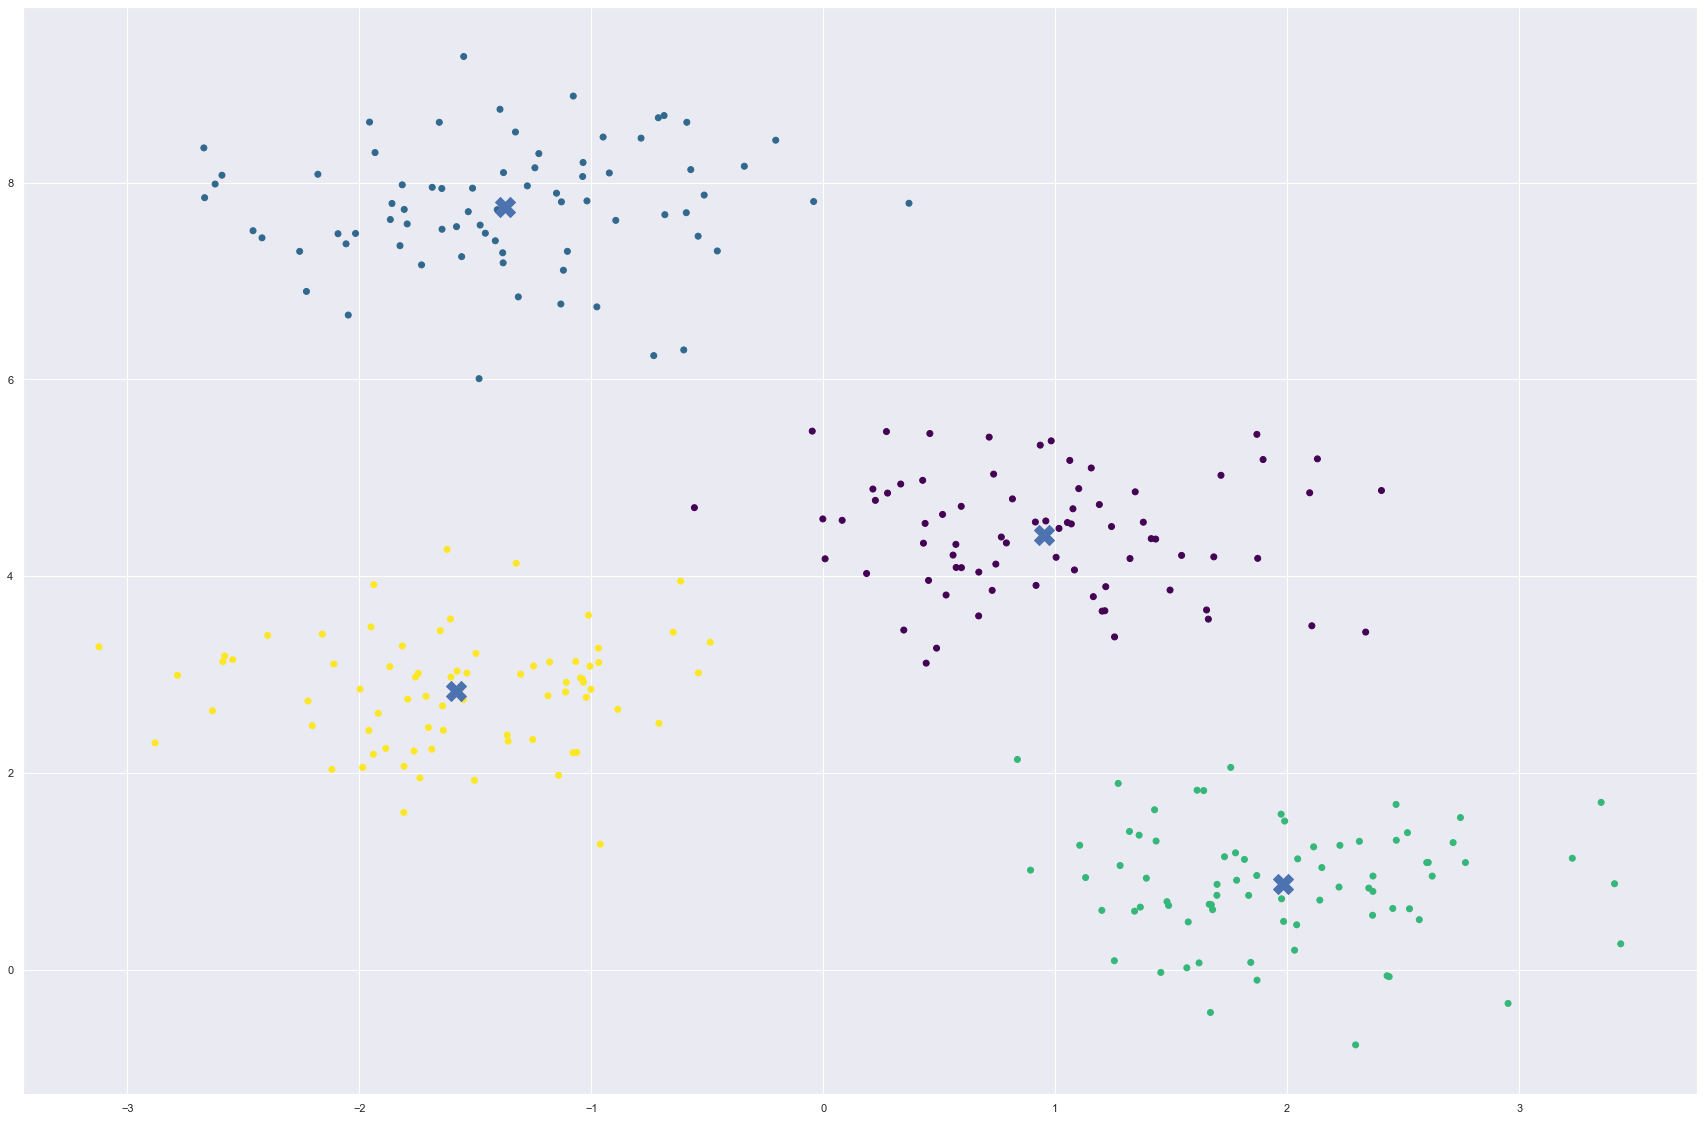

In [5]:
# fit our function to the data set with the starting point rseed=2 k=6.
centers, labels = find_clusters(X,4,2)
plt.figure(figsize=(30, 20))
plt.scatter(X[:,0],X[:,1],c=labels, cmap='viridis')
plt.scatter(centers[:, 0],centers[:, 1],marker='X',s=400)
plt.show()
# plot the figure

In [6]:
def calcdj(X, centers):
    dj_datapoints = []
    for i in X:
        centerpoint = []
        for j in centers:
            l2_distance= np.sum((j - i)**2)
            centerpoint.append(l2_distance)
        dj_datapoints.append(np.array(min(centerpoint)))
    return dj_datapoints
def calcpj(dj_datapoints):
    pj_datapoints = []
    for i in dj_datapoints:
#       pj=dj^2
        part1ofequation=np.array(np.square(i))
#       sum_all(d^2)
        part2ofequation= np.array(np.sum(np.square(dj_datapoints)))
        pj_datapoints.append(part1ofequation/part2ofequation)
    return pj_datapoints

In [7]:
# def the init function for kmean++:
def init_center(k,X,rseed):
#     create a empty list store centers
    centers=[]
#   random choose a center:
#   using np.random.RandomState first to set the seed and store it to a variable r
    r = np.random.RandomState(rseed)
#   using r.permutation(data shape) to choose first data point index as initial center.
    initial_center =   r.permutation(X)[np.random.randint(0,len(X))]
    print(initial_center)
#   append this center to the center list
    centers.append(initial_center)
#   while the length of the list less than k:
    while(len(centers)<k):
#   calculate dj for all data point: dj=min(||x^j-c_k||) whiere dj store the distance to the cloest center
        dj_datapoints=calcdj(X, centers)
#   calculate pj: pj=dj^2/sum_all(d^2) for all data point
        pj_datapoints=calcpj(dj_datapoints)
#   random choose j using the probability:
#   using np.random.choice()
        j = np.random.choice(len(X),p=pj_datapoints)
#   set the new center to be x^j
        new_center = X[j]
#   append the new center to center list
        centers.append(new_center)
    allcenters = np.empty((4,2))
    for i in range(len(centers)):
        allcenters[i][0] = centers[i][0]
        allcenters[i][1] = centers[i][1]
#     return all centers
    return allcenters


In [8]:
# def the kmean++:
def kmpp(X, n_clusters, rseed):
#     first init centers
#     then, run the k-means with the initialized centers.
    # first init centers
    initial_centers = init_center(n_clusters,X,rseed)
    print("Initial Centroids")
    plt.figure(figsize=(30, 20))
    plt.scatter(X[:,0],X[:,1], cmap='viridis')
    plt.scatter(initial_centers[:, 0],initial_centers[:, 1],marker='X',s=400)
    plt.show()
    # then, run the k-means with the initialized centers. 
    convergence = False
    while not convergence:
        # Assign labels based on closest center using pairwise_distances_argmin()
        label =pairwise_distances_argmin(X,initial_centers)
        # Find new centers from means of points:
        # Update centroid of each cluster to be the average(mean) of examples assigned to cluster k
        new_centers = np.empty((4,2))
        for i in range(len(initial_centers)):
            new_centers[i][0],new_centers[i][1] = getcenterpointsMEAN(label,X,i)
        #  check for convergence:
        # convergence if old center is new center
        if ((new_centers==initial_centers).all()):
            convergence = True
        else:
            initial_centers = new_centers
    return initial_centers,label

## Fit the model on the dataset and plot the figure with default seed (Graph 3)

[-2.66676007  7.84766052]
Initial Centroids


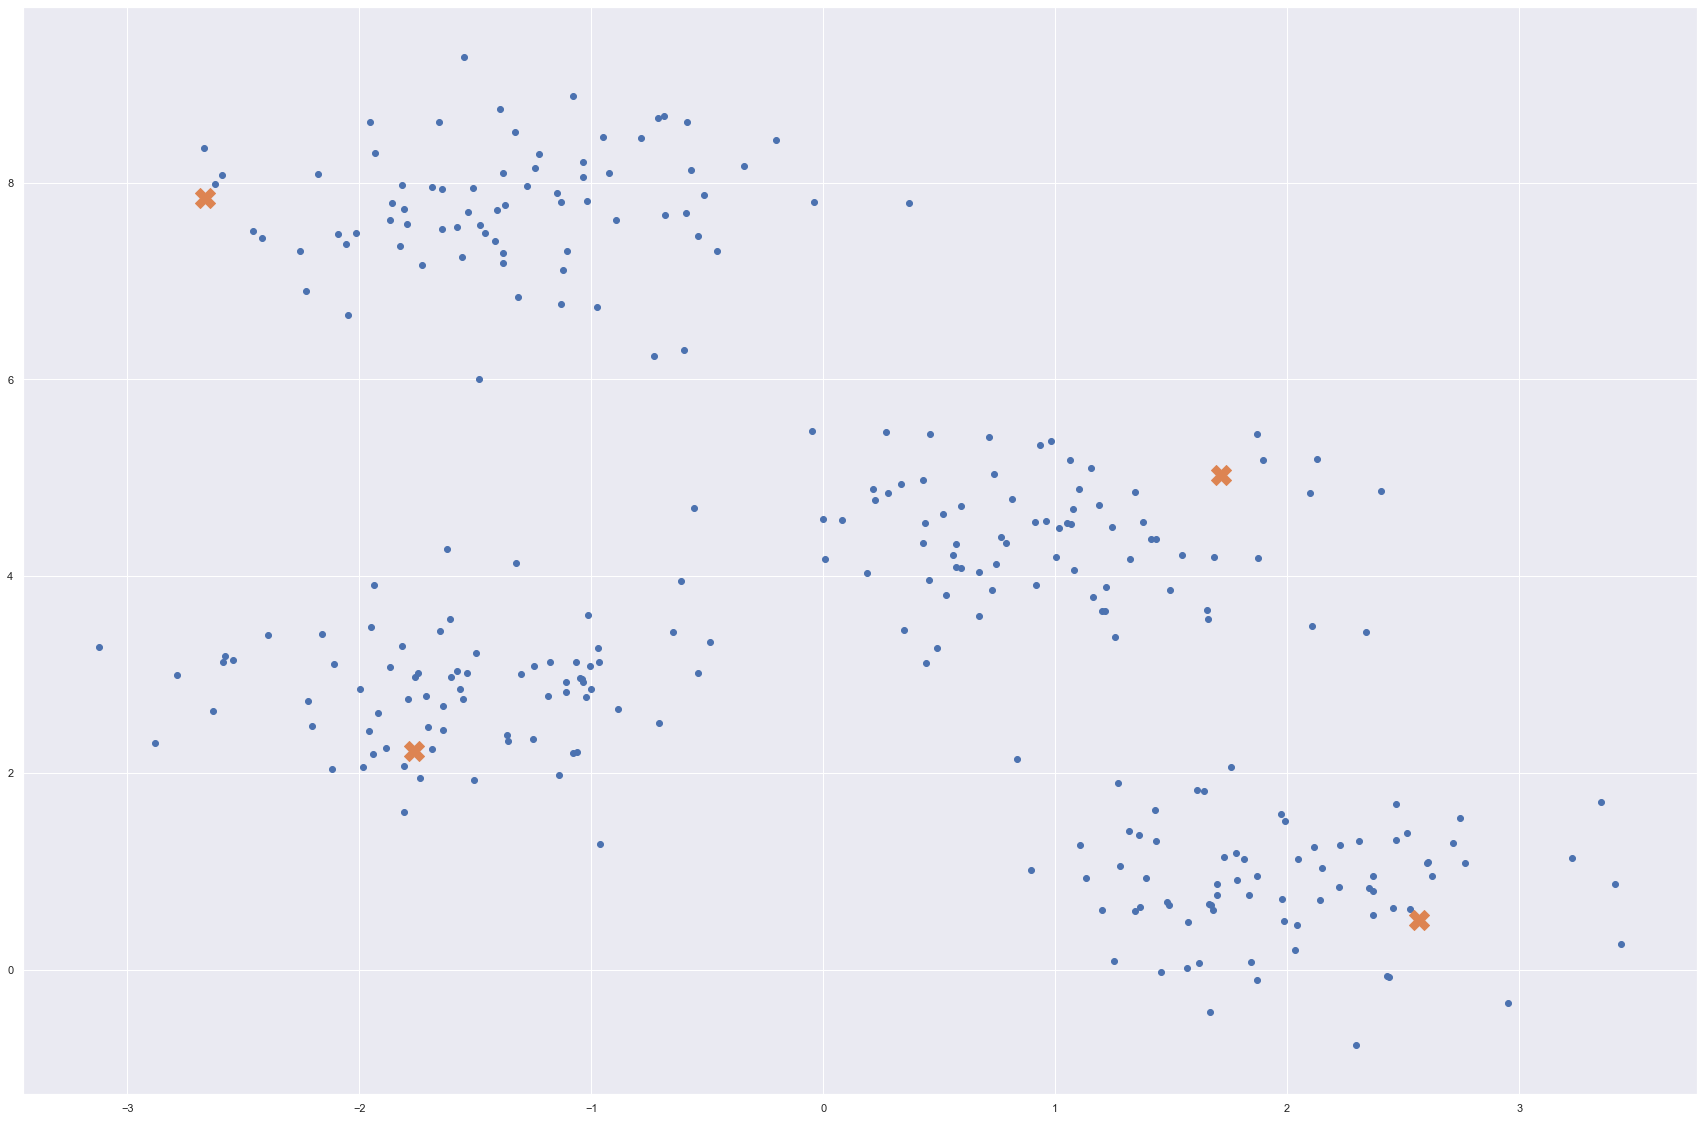

Clustered Data: 


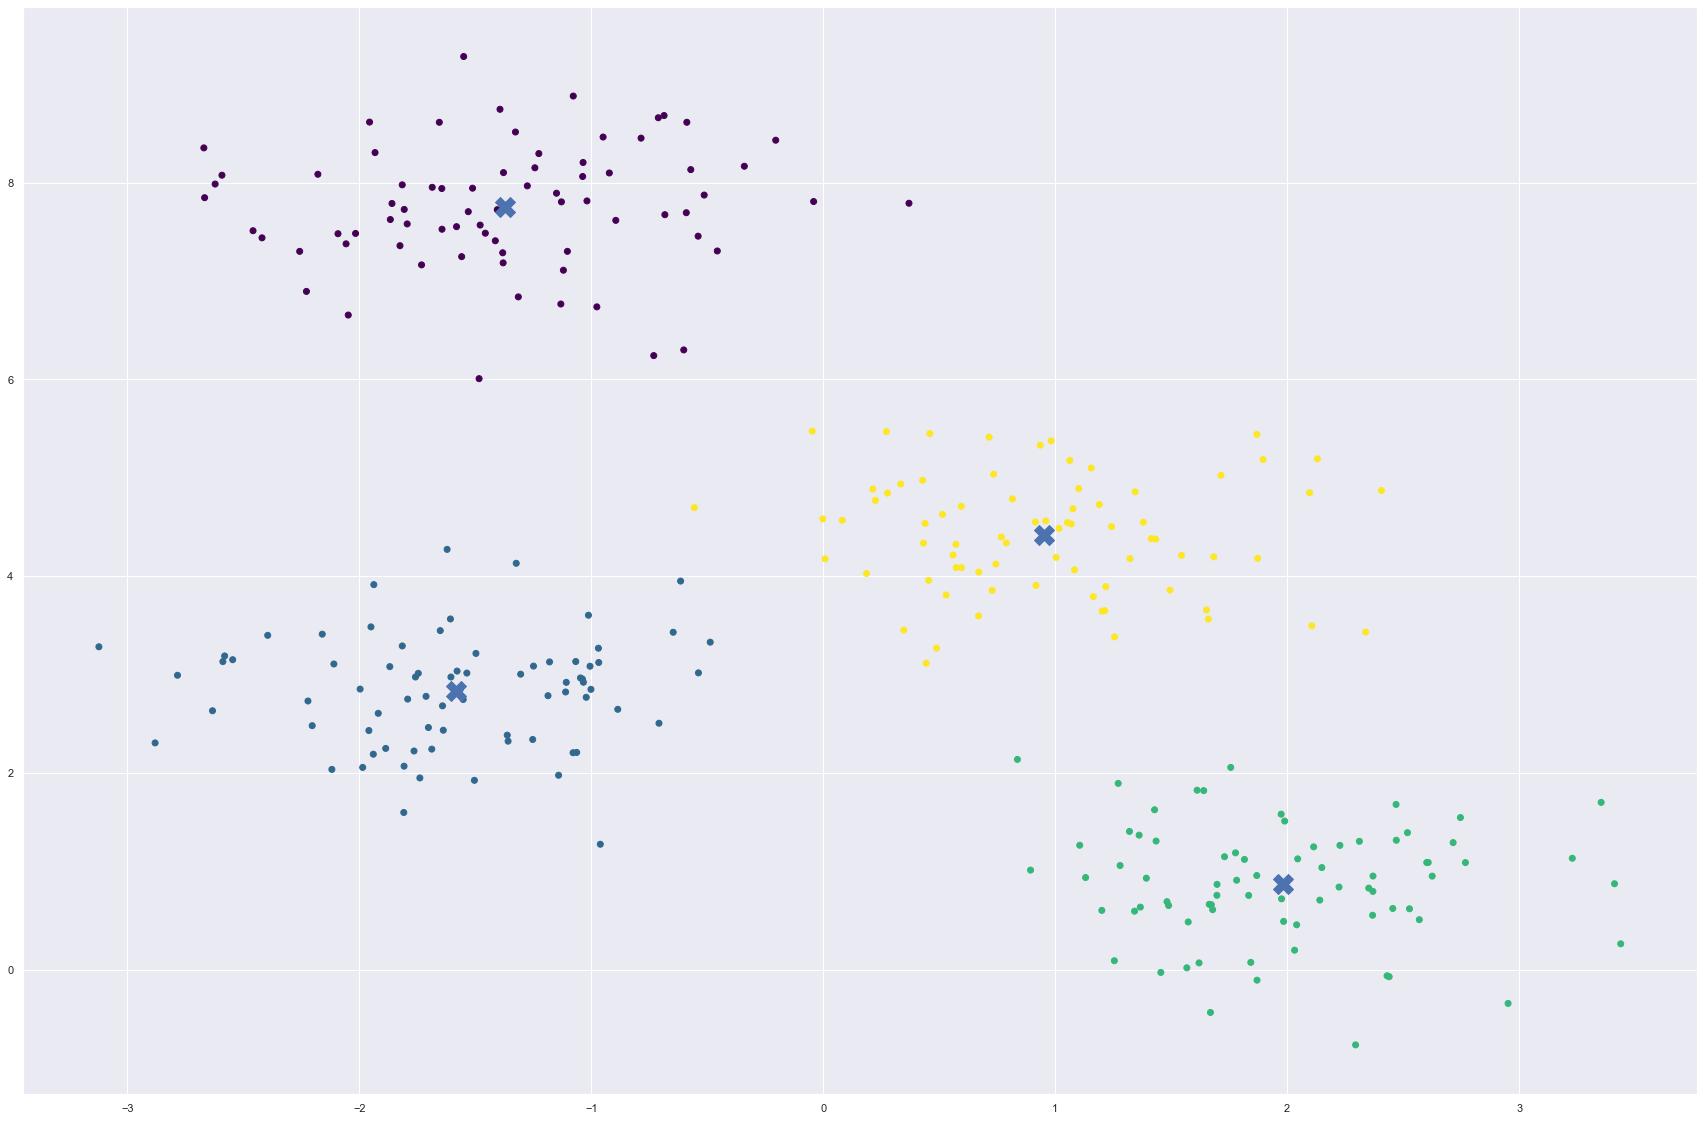

In [9]:
# fit our kmean++ function to the data set with rseed=0.
# plot the figure
centers, labels = kmpp(X,4,0)
print("Clustered Data: ")
plt.figure(figsize=(30, 20))
plt.scatter(X[:,0],X[:,1],c=labels, cmap='viridis')
plt.scatter(centers[:, 0],centers[:, 1],marker='X',s=400,  cmap='viridis')
plt.show()

## Fit the model on the dataset and plot the figure with seed=2 (Graph 4)

[1.25566754 3.38204112]
Initial Centroids


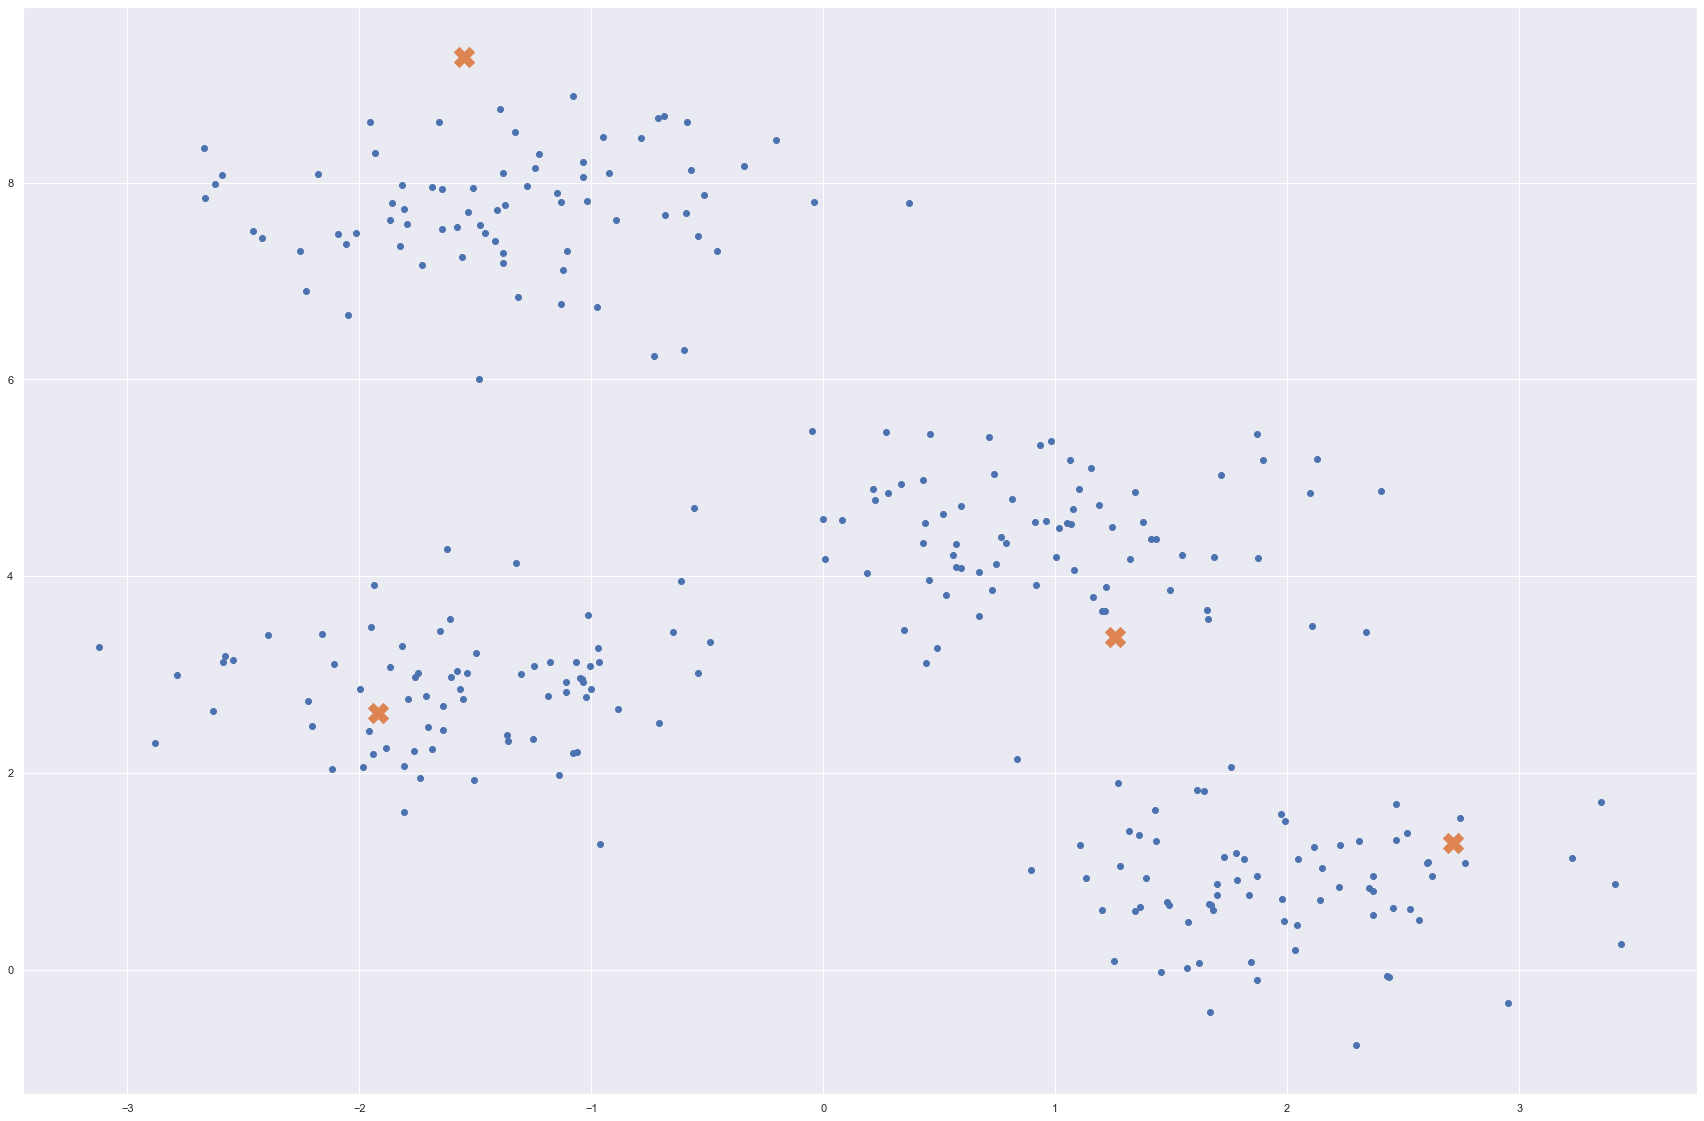

Clustered Data: 


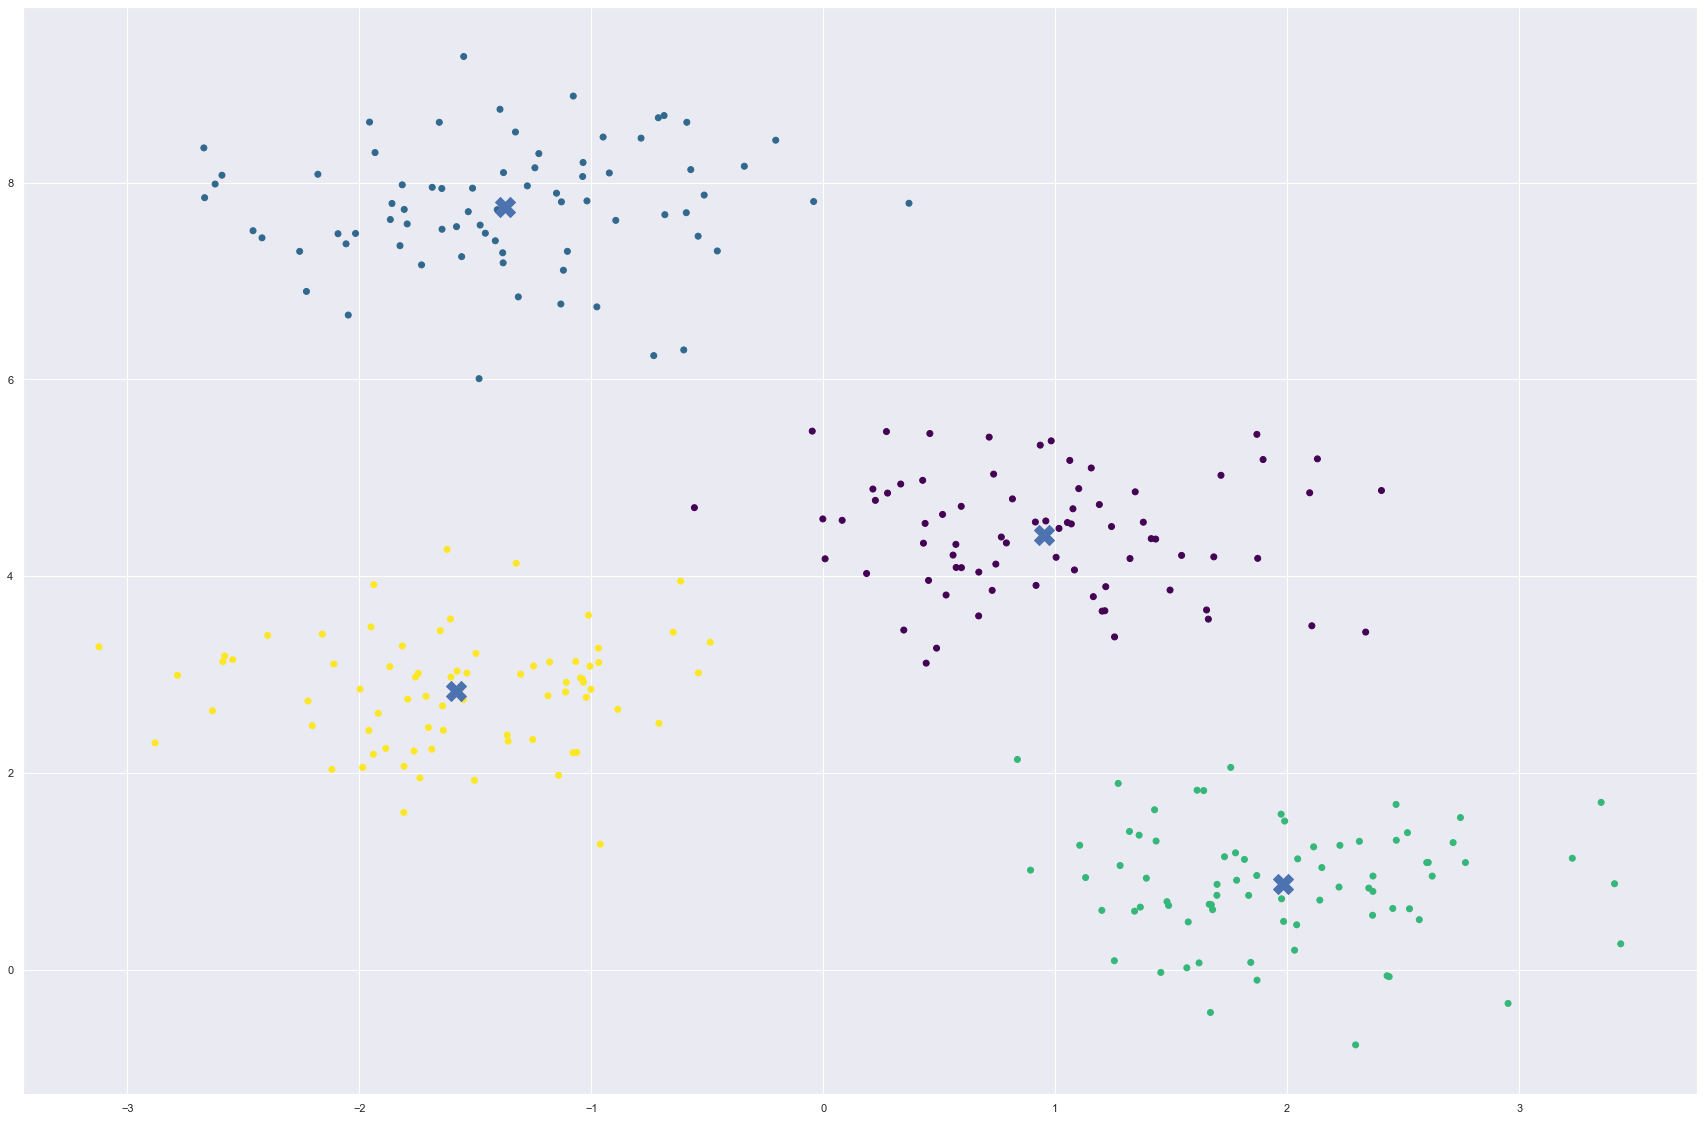

In [10]:
# fit our kmean++ function to the data set with rseed=2.
# plot the figure
centers, labels = kmpp(X,4,2)
print("Clustered Data: ")
plt.figure(figsize=(30, 20))
plt.scatter(X[:,0],X[:,1],c=labels, cmap='viridis')
plt.scatter(centers[:, 0],centers[:, 1],marker='X',s=400)
plt.show()

## Comparing results of Graph 1 to Graph 2,  Is there any differences? If yes, why?
Yes we can clearly see a difference between graph 1 and graph 2. The difference comes from the initilization of the rseed. When we have the rseed=0, as we see that we have two clouds that are not seperate and next to each other. While when we set the rseed to equal to 2, we get clean and seperated clouds/clusters as we wanted. We are getting a difference because the rseed initialization plays a role in finding out which rseed value would be the best fit in order to generate the initial centroids. 

## Comparing results of Graph 3 to Graph 4,  Is there any differences? If yes, why?
No, as both graphs are yeilding the same clusters, where rseed isn't playing the biggest role in the final graph, but when rseed=0, the inital graphs are different but the difference in the clusstered graphs is bigger. 

## Comparing results of graphs 1,2,3, and 4 ,  state your observations?
* Using Kmean plus gave better values therefore I believe the more accurate clusters are toward the end(3 and 4)
* Graph 1 was way off than any other of the other graphs
* Graph 2, 3, 4 were relativiley similar but still kmean plus graphs are better when we are dealing with more complicated data
* I was suprised that graphs 2,3,4 were similar, but it came to be clear at the end as the the kmean chooses the centroids in a smart way where the output for the data on the graph would be similar will be similar. Graph 3, where rseed=2 was relatively closer and thats why the output of graph 2 was similar to the last two graphs even though we are using k mean for graph 2 and k mean plus for graph 3 and 4 